In [10]:
#plot&calc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import umap

#ファイル管理系
import os
import glob

import scipy
import scipy.optimize as optimize
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

/Users/satoshi_matsuno/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/25/2qmt1kt54xz_bt4vrdrbhh4m0000gn/T/ipykernel_17632/154374670.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=UMAP_data_umap, x=0, y=1, palette="Dark2", alpha=1, ax=ax)


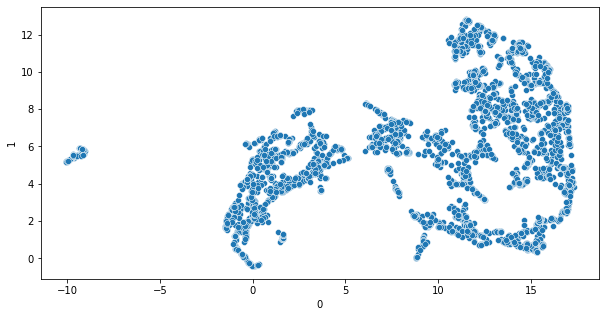

In [25]:
#path_all_train_data = "../0_Model_Construction_Protolith_Composition_Data/PRM_For_Metabasalt/PetDB_Metabasalt_20231126.xlsx"
path_all_train_data = "../0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/"
########################################################## UMAP Tectonic Setting
#UMAP_data_RAW = pd.read_excel(path_all_train_data, index_col=0, header=7)
UMAP_data_RAW = pd.read_excel(path_all_train_data+"USE_DATA.xlsx")
data_train_setting = pd.read_excel(path_all_train_data+"/Protolith/Cannot_applied.xlsx")

immobile_list = ["Zr", "Th", "Ti", "Nb"]

#使うデータを抽出
UMAP_data = UMAP_data_RAW[immobile_list].copy().dropna().apply(lambda x: np.log10(x)) # 使用データ log変換

############################################## UMAP 処理 前処理→UMAP→Compile
#####前処理 ->標準化　平均0　分散1
SDS = StandardScaler()
SDS.fit(UMAP_data)
UMAP_data_SD = SDS.transform(UMAP_data)

##### reducer
reducer = umap.UMAP(random_state=77)
reducer.fit(UMAP_data_SD)
#Protolith、SAの両方にフィット
#reducer.fit(np.concatenate([Protolith_data_SD, SA_protolith_SD]))
UMAP_data_umap = reducer.transform(UMAP_data_SD)

#####compile
UMAP_data_umap = pd.DataFrame(UMAP_data_umap, index = UMAP_data.index)
############################################## UMAP 処理 前処理→UMAP→Compile
####### read color value
fig, ax = plt.subplots(figsize=(10, 5))        
sns.scatterplot(data=UMAP_data_umap, x=0, y=1, palette="Dark2", alpha=1, ax=ax)
#plt.savefig(figure_folder_UMAP+'/umap_tectonic_setting.pdf', bbox_inches='tight')
plt.show()
########################################################## UMAP Tectonic Setting

In [29]:
index_anomalous = UMAP_data_umap[UMAP_data_umap[0]<-6].index
check_data = pd.concat([UMAP_data_RAW.loc[index_anomalous], data_train_setting.loc[index_anomalous]], axis=1)
check_data.to_excel("check_datalist.xlsx")

In [31]:
check_data

,SAMPLE ID,Rb,Ba,Th,U,Nb,K,La,Ce,Pb,...,H2O_P.2,INDIUM.1,DataBase,SAMPLE_INFO,index,CaO*,CIA*,CIA,K2O+Na2O,100*K2O/(K2O+Na2O)
4398,PETDB-2801-05,15.748031,19.029904,11.764706,19.047619,29.453015,17.266964,23.289665,20.281690,98.591549,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2801-05,8.019429,10.695477,10.695986,3.14,16.560510
4400,PETDB-2801-07,14.173228,13.020461,23.529412,NaN,28.050491,16.602850,26.200873,20.845070,NaN,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2801-07,7.779472,10.471479,10.471954,3.11,16.077170
4401,PETDB-2801-08,17.322835,19.172986,11.764706,19.047619,30.855540,17.599021,23.289665,20.281690,NaN,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2801-08,7.599429,11.000869,11.001407,3.24,16.358025
4402,PETDB-2801-09,15.748031,14.308199,11.764706,NaN,30.855540,17.266964,4.366812,28.732394,NaN,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2801-09,7.469450,11.037976,11.038506,3.19,16.300940
4403,PETDB-2801-10,12.598425,18.171412,11.764706,19.047619,29.453015,16.270793,21.834061,19.154930,14.084507,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2801-10,7.869472,10.286347,10.286812,3.08,15.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,PETDB-2805-SN91-60,15.433071,17.169838,19.294118,22.857143,38.709677,16.602850,27.700146,23.859155,20.140845,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2805-SN91-60,10.589239,12.444390,12.445006,3.35,14.925373
4709,PETDB-2805-W95-25,7.559055,7.583345,10.000000,12.857143,20.336606,12.950223,18.195051,17.036620,21.126761,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2805-W95-25,12.089408,8.675637,8.675951,3.28,11.890244
4710,PETDB-2805-W95-54,10.708661,9.872657,14.470588,19.047619,26.367461,19.259306,26.768559,24.963380,22.253521,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2805-W95-54,10.749133,11.424321,11.424944,3.87,14.987080
4712,PETDB-2805-W95-74,6.456693,6.724853,8.705882,12.380952,17.391304,11.621995,16.564774,15.391549,19.436620,...,NaN,NaN,petdb,OCEAN_ISLAND,PETDB-2805-W95-74,12.819472,7.085028,7.085252,3.09,11.326861
